In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import math

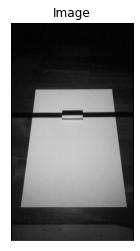

In [2]:
frame = cv2.imread('../imgs/alternate/Untitled_000037.png')
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(frame_gray, cmap='gray', vmin=0)
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

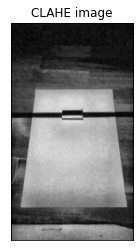

In [3]:
kernel_size = 7
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(kernel_size,kernel_size))
cl1 = clahe.apply(frame_gray)

plt.imshow(cl1, cmap='gray', vmin=0)
plt.title('CLAHE image'), plt.xticks([]), plt.yticks([])
plt.show()

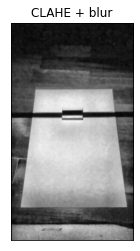

In [4]:
kernel = 9
blur = cv2.GaussianBlur(cl1,(kernel,kernel),0)
plt.imshow(blur, cmap='gray', vmin=0)
plt.title('CLAHE + blur'), plt.xticks([]), plt.yticks([])
plt.show()

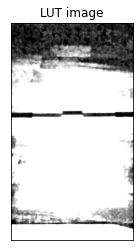

In [5]:
lookUpTable = np.empty((1,256), np.uint8)
gamma = 2
for i in range(256):
    lookUpTable[0,i] = np.clip( 6*i - 60 , 0 , 255)
lut_img = cv2.LUT(blur, lookUpTable)

plt.imshow(lut_img, cmap='gray', vmin=0)
plt.title('LUT image'), plt.xticks([]), plt.yticks([])
plt.show()

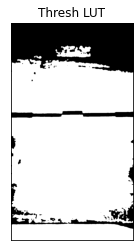

In [6]:
ret,thres = cv2.threshold(lut_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres, cmap='gray', vmin=0)
plt.title('Thresh LUT'), plt.xticks([]), plt.yticks([])
plt.show()

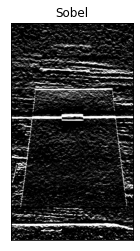

In [7]:
imgWithSobelX = cv2.Sobel(blur, cv2.CV_8U, 1, 0, ksize=5)
imgWithSobelY = cv2.Sobel(blur, cv2.CV_8U, 0, 1, ksize=5)

abs_grad_x = cv2.convertScaleAbs(imgWithSobelX)
abs_grad_y = cv2.convertScaleAbs(imgWithSobelY)
grad = cv2.addWeighted(abs_grad_x, 0.1, abs_grad_y,0.9, 0)

plt.imshow(abs_grad_y, cmap='gray', vmin=0)
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.show()

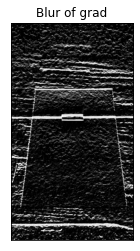

In [8]:
kernel = 7
blur_new = cv2.GaussianBlur(grad,(kernel,kernel),0)
plt.imshow(grad, cmap='gray', vmin=0)
plt.title('Blur of grad'), plt.xticks([]), plt.yticks([])
plt.show()

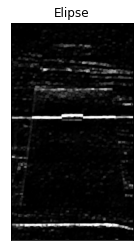

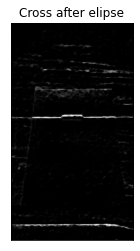

In [9]:
#kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(15,15))
#cross = cv2.morphologyEx(blur, cv2.MORPH_ERODE, kernel)

kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
ellipse = cv2.morphologyEx(blur_new, cv2.MORPH_OPEN, kernel)

kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(15,15))
cross = cv2.morphologyEx(ellipse, cv2.MORPH_ERODE, kernel)

plt.imshow(ellipse, cmap='gray', vmin=0)
plt.title('Elipse'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cross, cmap='gray', vmin=0)
plt.title('Cross after elipse'), plt.xticks([]), plt.yticks([])
plt.show()

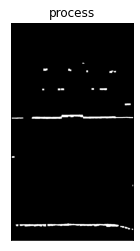

True

In [10]:
#process = cross.copy()
process = cv2.bitwise_and(ellipse,ellipse,mask=thres)
process[process < 127] = 0
process[process >= 127] = 255

plt.imshow(process, vmin=0, cmap='gray')
plt.title('process'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite(r'C:\Users\torre\Desktop\Projs\vcom\imgs_out\process.jpg',abs_grad_y)

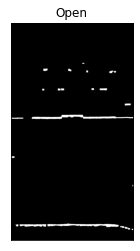

In [11]:
#erosion = cv2.erode(process,(3,3),iterations = 1)
opening = cv2.morphologyEx(process,cv2.MORPH_OPEN,(25,25))
plt.imshow(opening, vmin=0, cmap='gray')
plt.title('Open'), plt.xticks([]), plt.yticks([])
plt.show()

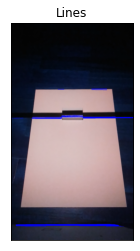

In [12]:
frame_gray_copy = frame.copy()

edges = cv2.Canny(opening,5,20,apertureSize = 3)
lines = cv2.HoughLinesP(opening,1,np.pi/180,150,minLineLength=25,maxLineGap=70)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(frame_gray_copy,(x1,y1),(x2,y2),(0,0,255),1)

plt.imshow(frame_gray_copy, vmin=0, cmap='gray')
plt.title('Lines'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
cv2.imwrite('../imgs/line1.jpg',frame_gray_copy)

True

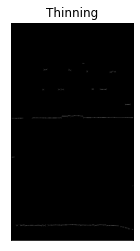

In [14]:
img1 = opening.copy()
# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Create an empty output image to hold values
thin = np.zeros(img1.shape,dtype='uint8')
 
# Loop until erosion leads to an empty set
while (cv2.countNonZero(img1)!=0):
    # Erosion
    erode = cv2.erode(img1,kernel)
    # Opening on eroded image
    openi = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    # Subtract these two
    subset = erode - openi
    # Union of all previous sets
    thin = cv2.bitwise_or(subset,thin)
    # Set the eroded image for next iteration
    img1 = erode.copy()

plt.imshow(thin, vmin=0, cmap='gray')
plt.title('Thinning'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
cv2.imwrite('../imgs/thin.jpg',thin)

True

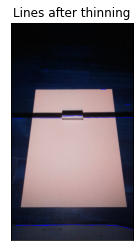

True

In [30]:
frame_gray_copy = frame.copy()

edges = cv2.Canny(thin,5,20,apertureSize = 3)
lines = cv2.HoughLinesP(thin,1,np.pi/180,25,minLineLength=20,maxLineGap=50)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(frame_gray_copy,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(frame_gray_copy, vmin=0, cmap='gray')
plt.title('Lines after thinning'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('../imgs/line_thin.jpg',frame_gray_copy)

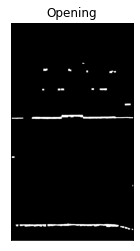

True

In [17]:
plt.imshow(opening, vmin=0, cmap='gray')
plt.title('Opening'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('../imgs/opening.jpg',opening)

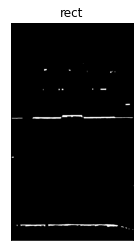

True

In [18]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(15,5))
rect = cv2.morphologyEx(opening, cv2.MORPH_ERODE, kernel)
plt.imshow(rect, vmin=0, cmap='gray')
plt.title('rect'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('../imgs/rect.jpg',rect)

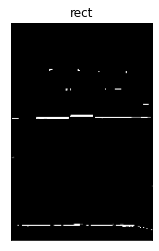

In [19]:
temp = cv2.resize(rect,(130,200))
plt.imshow(temp, vmin=0, cmap='gray')
plt.title('rect'), plt.xticks([]), plt.yticks([])
plt.show()

In [43]:
new_lines = []

current_line = None
dist = 10000000
height,width = thin.shape[:2]
pos = (0,height/2)

for line in lines :
    x1,y1,x2,y2 = line[0]
    if math.dist((x1,y2), pos) < dist:
        dist = math.dist((x1,y2), pos)
        current_line = line

new_lines.append(current_line)

while current_line is not None:
    pos = (current_line[0][2],current_line[0][3])
    new_line = None
    dist = 100000
    for line in lines :
        x1,y1,x2,y2 = line[0]
        line_dist = math.dist((x1,y1), pos)
        if x1 > current_line[0][2] and line_dist - math.dist((x1,y1),(x2,y2)) < dist:
            dist = math.dist((x1,y2), pos)
            new_line = line
    if new_line is not None:
        new_lines.append(new_line)
    current_line = new_line

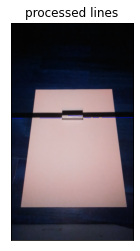

True

In [44]:
frame_gray_copy = frame.copy()

for line in new_lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(frame_gray_copy,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(frame_gray_copy, vmin=0, cmap='gray')
plt.title('processed lines'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('../imgs/processedLines.jpg',frame_gray_copy)